In [1]:
'''
Init db connection and start db session
'''
import pymongo
import time

host = "192.168.50.41"
port = 27017
db_name = 'mt'
client = pymongo.MongoClient(host, port)
db = client[db_name]
dbSessColl = db['mt_sess']
datColl = db['enctest_dat']
# Create document for session data
sessHead = {
    'ts': time.time(),
    'data_recs': [],
}
sessRecID = dbSessColl.insert_one(sessHead).inserted_id
# datRec = {
#     'ts': [],
#     'vals_sense': [],
#     'vals_rh1': [],
#     'vals_rh2': [],
#     'vals_rh3': [],
# }
#datRecID = datColl.insert_one(datRec).inserted_id


In [46]:
import serial
import time

serial_port='COM5' 
baud_rate=500000
ser = serial.Serial(serial_port, baud_rate)
outs = {
    "0": 0,
    "1": 0,
    "2": 0,
}
datRec = {
    'ts': [],
    'vals_sense': [],
    'vals_rh1': [],
    'vals_rh2': [],
    'vals_rh3': [],
}
ts = []
vals_sense = []
vals_sense_c = []
vals_rh1 = []
vals_rh2 = []
vals_rh3 = []
val_sense = 0
while True:
    if ser.in_waiting > 0:
        # while ser.in_waiting:
        x = ser.readline().decode('utf-8')
        #x.strip('\r\n')
        sub1 = x.strip('\r\n').split('<')
        if sub1[1] == "SEGEND":
            #Test Segment end routine
            print("Segment Ended")
            for val in vals_sense_c:
                val_sense = (-1*(val - vals_sense_c[0]) + val_sense)
                vals_sense.append(val_sense)
            
            datRec['vals_sense'].extend(vals_sense)
            datRec['vals_rh1'].extend(vals_rh1)
            datRec['vals_rh2'].extend(vals_rh2)
            datRec['vals_rh3'].extend(vals_rh3)
            vals_sense = []
            vals_sense_c = []
            vals_rh1 = []
            vals_rh2 = []
            vals_rh3 = []
        elif sub1[1] == "REV":
            print("Run Ended")
            break
        else:
            ts.append(time.time())
            vals_sense_c.append(float(sub1[1]))
            vals_rh1.append(float(sub1[2]))
            vals_rh2.append(float(sub1[3]))
            vals_rh3.append(float(sub1[4]))

print("Saving to DB")
datRecID = datColl.insert_one(datRec).inserted_id
print(f"Data pushed to DB at RecID: {datRecID}")
ser.flushInput()
ser.flushOutput()
serial.Serial.close(ser)

        # datRec['ts'].append(time.time())
        # datRec['vals_sense'].append(float(sub1[1]))
        # datRec['vals_rh1'].append(float(sub1[2]))
        # datRec['vals_rh2'].append(float(sub1[3]))
        # datRec['vals_rh3'].append(float(sub1[4]))
        # val_sense = sub1[1]
        # val_rh1 = sub1[2]
        # val_rh2 = sub1[3]
        # val_rh3 = sub1[4]
        # for inc, entry in enumerate(sub1):
        #     if entry:
        #         sub2 = entry.split(">>")
        #         sub3 = sub2[0].split("><")
        #         val = int(sub3[1])
        #         outs[str(inc-1)] = val
        # datColl.update_one({'_id': datRecID}, {'$push': {'ts': time.time()}})
        # datColl.update_one({'_id': datRecID}, {'$push': {'vals_sense': sub1[1]}})
        # datColl.update_one({'_id': datRecID}, {'$push': {'vals_rh1': sub1[2]}})
        # datColl.update_one({'_id': datRecID}, {'$push': {'vals_rh2': sub1[3]}})
        # datColl.update_one({'_id': datRecID}, {'$push': {'vals_rh3': sub1[4]}})
    #time.sleep(10)


Segment Ended
Segment Ended
Segment Ended
Run Ended
Saving to DB
Data pushed to DB at RecID: 6716a1489acd6d58d443e9ad


In [18]:
ser.flushInput()
ser.flushOutput()
serial.Serial.close(ser)

In [1]:
print(x)
print(sub1)

NameError: name 'x' is not defined

In [ ]:
print(len(datRec['vals_rh1']))
print(len(datRec['vals_rh2']))
print(len(datRec['vals_rh3']))

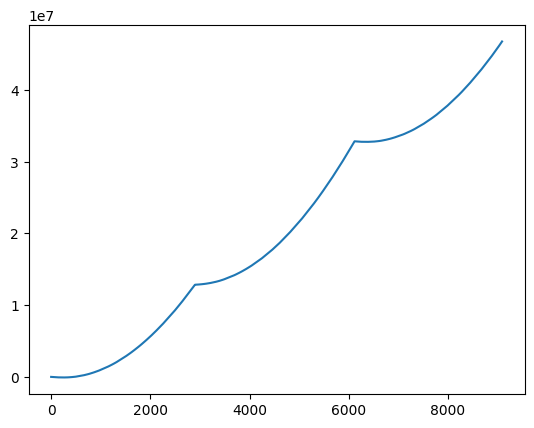

In [47]:
from matplotlib import pyplot as plt

plt.plot(datRec['vals_sense'])

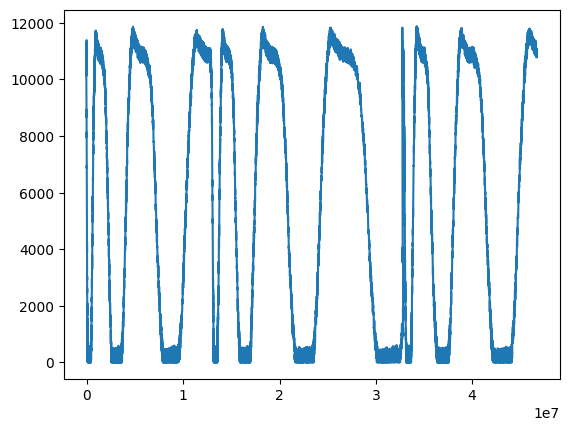

In [48]:
plt.plot(datRec['vals_sense'], datRec['vals_rh1'])

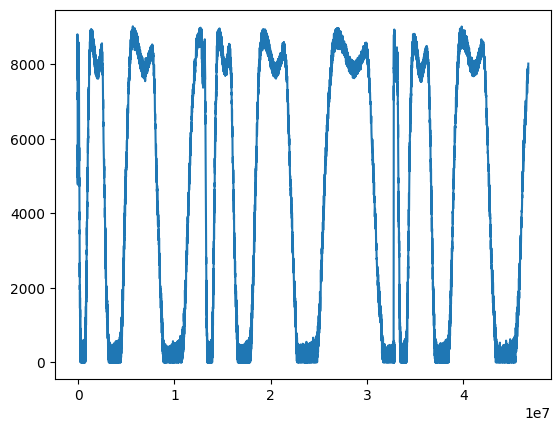

In [49]:
plt.plot(datRec['vals_sense'], datRec['vals_rh2'])

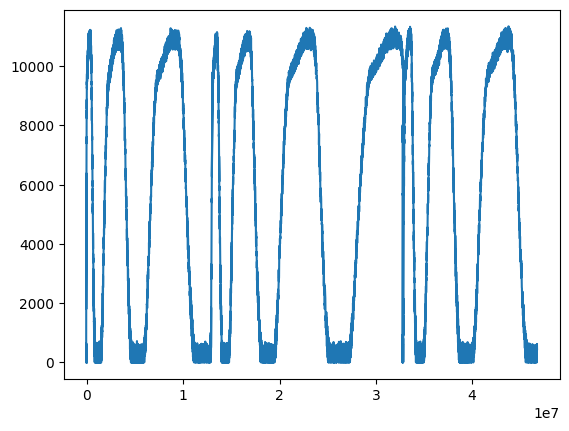

In [50]:
plt.plot(datRec['vals_sense'], datRec['vals_rh3'])

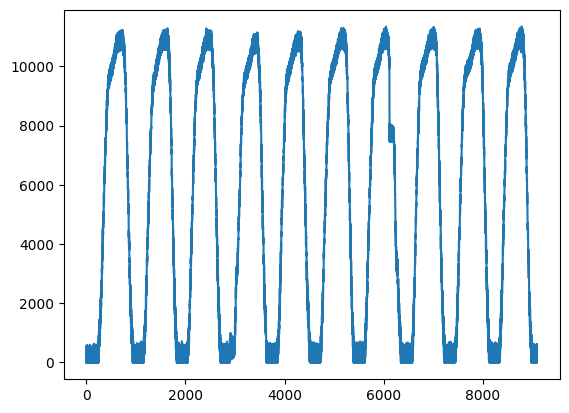

In [51]:
plt.plot(datRec['vals_rh3'])


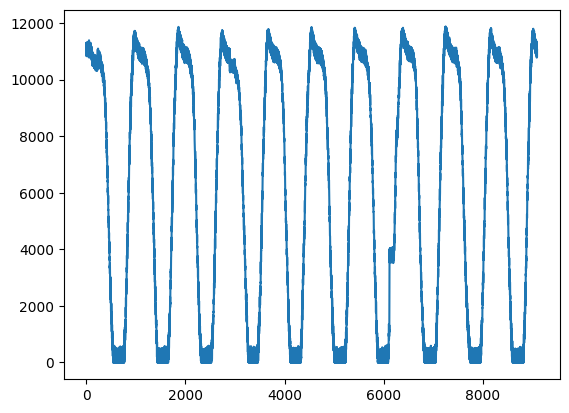

In [52]:
plt.plot(datRec['vals_rh1'])


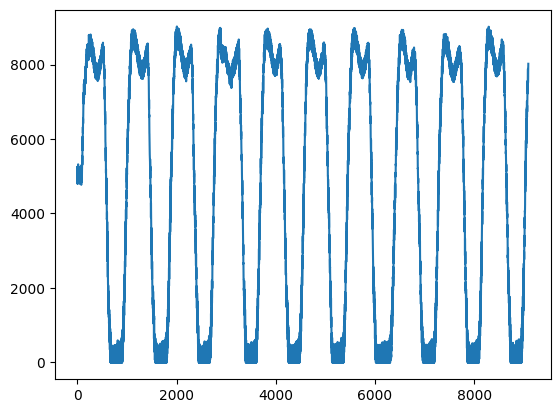

In [53]:
plt.plot(datRec['vals_rh2'])
